In [44]:
import numpy as np
import matplotlib.pyplot as plt

## 1 (آ، ب، ج)

In [45]:
class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    # Hebbian learning rule for training
    def train(self, patterns):
        num_patterns = len(patterns)
        for p in patterns:
            p = p.reshape(self.num_neurons, 1)
            self.weights += p @ p.T
        # Set diagonal to 0 (no neuron is connected to itself)
        np.fill_diagonal(self.weights, 0)
        self.weights /= num_patterns

    # Function to update state of the neurons
    def recall(self, pattern, steps=5):
        state = pattern.copy()
        for _ in range(steps):
            # Update each neuron asynchronously
            for i in range(self.num_neurons):
                net_input = np.dot(self.weights[i], state)
                state[i] = 1 if net_input >= 0 else -1
        return state

    # Energy function
    def energy(self, state):
        return -0.5 * np.sum(self.weights * np.outer(state, state))

# Convert [0,0,1,1] to [-1,-1,1,1] for Hopfield
def binary_to_bipolar(binary_pattern):
    return np.array([1 if x == 1 else -1 for x in binary_pattern])

# Convert [-1,-1,1,1] back to [0,0,1,1]
def bipolar_to_binary(bipolar_pattern):
    return np.array([1 if x == 1 else 0 for x in bipolar_pattern])

# Define the pattern [0, 0, 1, 1] and convert it to bipolar
pattern = binary_to_bipolar([0, 0, 1, 1])
hopfield_net = HopfieldNetwork(num_neurons=4)
hopfield_net.train([pattern])
test_pattern1 = binary_to_bipolar([0, 0, 1, 0])  # A noisy version of the pattern
recalled_pattern1 = hopfield_net.recall(test_pattern1)
recalled_pattern_binary1 = bipolar_to_binary(recalled_pattern1)
print("Recalled pattern:", recalled_pattern_binary1)
energy1 = hopfield_net.energy(recalled_pattern1)
print("Energy of recalled state:", energy1)

# Define the pattern [-1, -1, 1, 1]
print('--------------------------------------------')
pattern = np.array([-1, -1, 1, 1])
hopfield_net = HopfieldNetwork(num_neurons=4)
hopfield_net.train([pattern])
test_pattern = np.array([-1, -1, 1, -1])  # A noisy version of the pattern
print("Recalling pattern...")
recalled_pattern = hopfield_net.recall(test_pattern)
print("Recalled pattern:", recalled_pattern)
energy = hopfield_net.energy(recalled_pattern)
print("Energy of recalled state:", energy)

# Define the patterns [1, 1, -1, -1] and [-1, -1, 1, 1]
print('--------------------------------------------')
pattern1 = np.array([1, 1, -1, -1])
pattern2 = np.array([-1, -1, 1, 1])
hopfield_net = HopfieldNetwork(num_neurons=4)
hopfield_net.train([pattern1, pattern2])
test_pattern = np.array([1, 1, -1, 1])  # A noisy version of pattern1
print("Recalling pattern...")
recalled_pattern = hopfield_net.recall(test_pattern)
print("Recalled pattern:", recalled_pattern)
energy = hopfield_net.energy(recalled_pattern)
print("Energy of recalled state:", energy)


Recalled pattern: [0 0 1 1]
Energy of recalled state: -6.0
--------------------------------------------
Recalling pattern...
Recalled pattern: [-1 -1  1  1]
Energy of recalled state: -6.0
--------------------------------------------
Recalling pattern...
Recalled pattern: [ 1  1 -1 -1]
Energy of recalled state: -6.0


## 1 (د)

In [46]:
# Given weight matrix
W = np.array([[0,  0,  1, -1],
              [1,  0,  1, -1],
              [1,  1,  0, -1],
              [-1, -1, -1, 0]])

hopfield_net = HopfieldNetwork(W.shape[0])

# Start from a random initial state to extract the stored pattern
initial_state = np.array([-1, -1, -1, -1])  # Example of a random starting state

print("Initial state:", initial_state)

# Recall the stored pattern
recalled_pattern = hopfield_net.recall(initial_state)

print("Recalled pattern:", recalled_pattern)

# Calculate energy of the recalled state
energy = hopfield_net.energy(recalled_pattern)
print("Energy of recalled state:", energy)

Initial state: [-1 -1 -1 -1]
Recalled pattern: [1 1 1 1]
Energy of recalled state: -0.0


Original and Recalled Patterns:


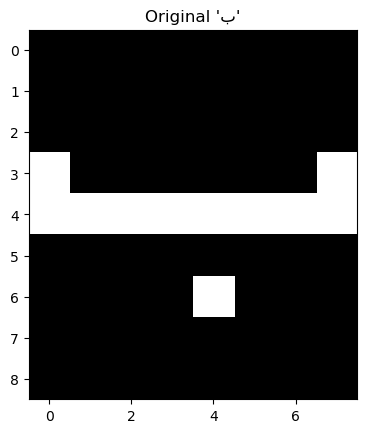

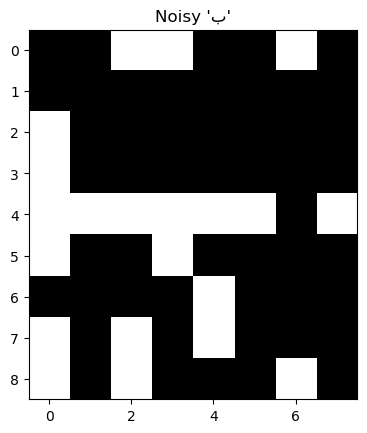

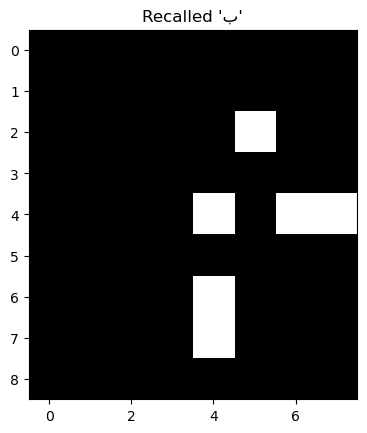

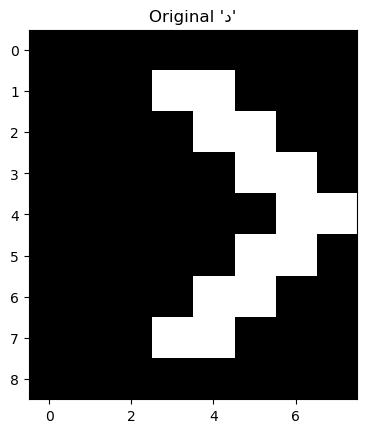

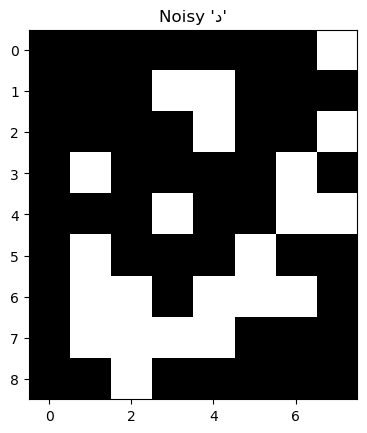

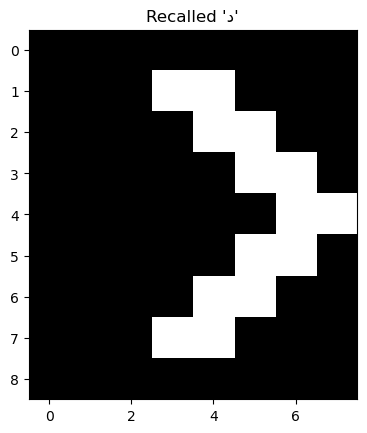

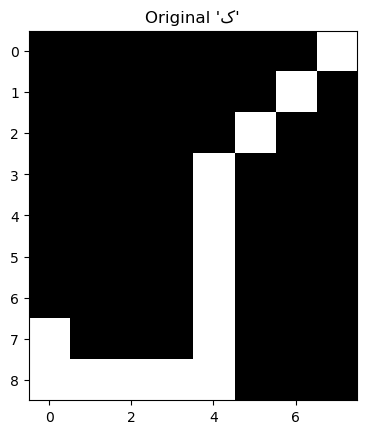

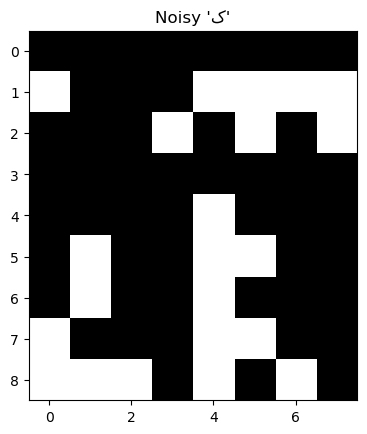

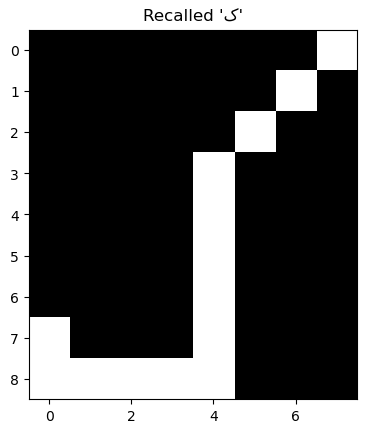

In [47]:
# Step 1: Define Hopfield network
class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))  # Weight matrix initialization

    def train(self, patterns):
        """ Train the Hopfield network using Hebbian learning rule """
        for p in patterns:
            p = p.reshape(-1, 1)  # Reshape pattern as a column vector
            self.weights += np.dot(p, p.T)  # Hebbian learning
        np.fill_diagonal(self.weights, 0)  # No self-connections

    def recall(self, pattern, steps=50):
        """ Recall a pattern by running the network """
        output = pattern.copy()
        for _ in range(steps):
            for i in range(self.num_neurons):
                net_input = np.dot(self.weights[i], output)
                output[i] = 1 if net_input >= 0 else -1
        return output

    def add_noise(self, pattern, noise_level=0.2):
        """ Add noise to a pattern (noise_level is the percentage of flipped bits) """
        noisy_pattern = pattern.copy()
        num_flips = int(noise_level * len(pattern))
        flip_indices = np.random.choice(len(pattern), size=num_flips, replace=False)
        noisy_pattern[flip_indices] = -noisy_pattern[flip_indices]  # Flip selected bits
        return noisy_pattern

# Step 2: Define letter patterns (Here we use simplified binary arrays to represent letters)
def create_letter_patterns():
    # Letter 'ب' (B) - A 5x5 representation
    letter_B = np.array([
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0],
        [1,0,0,0,0,0,0,1],
        [1,1,1,1,1,1,1,1],
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0]
    ])

    # Letter 'د' (D) - A 5x5 representation
    letter_D = np.array([
        [0,0,0,0,0,0,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,0,1,1,0,0],
        [0,0,0,0,0,1,1,0],
        [0,0,0,0,0,0,1,1],
        [0,0,0,0,0,1,1,0],
        [0,0,0,0,1,1,0,0],
        [0,0,0,1,1,0,0,0],
        [0,0,0,0,0,0,0,0]
    ])

    # Letter 'ک' (K) - A 5x5 representation
    letter_K = np.array([
        [0,0,0,0,0,0,0,1],
        [0,0,0,0,0,0,1,0],
        [0,0,0,0,0,1,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,1,0,0,0],
        [1,0,0,0,1,0,0,0],
        [1,1,1,1,1,0,0,0]
        

    ])

    # Convert to bipolar (-1, 1)
    letter_B = letter_B * 2 - 1
    letter_D = letter_D * 2 - 1
    letter_K = letter_K * 2 - 1

    return letter_B.flatten(), letter_D.flatten(), letter_K.flatten()

# Step 3: Store the letters in the Hopfield network
letter_B, letter_D, letter_K = create_letter_patterns()
letters = np.array([letter_B, letter_D, letter_K])

num_neurons = len(letter_B)  # All letters have the same number of neurons (5x5 = 25 neurons)
hopfield_net = HopfieldNetwork(num_neurons=num_neurons)
hopfield_net.train(letters)

# Step 4: Add noise to the patterns (20% noise)
noisy_B = hopfield_net.add_noise(letter_B, noise_level=0.2)
noisy_D = hopfield_net.add_noise(letter_D, noise_level=0.2)
noisy_K = hopfield_net.add_noise(letter_K, noise_level=0.2)

# Step 5: Recall the patterns from the noisy inputs
recalled_B = hopfield_net.recall(noisy_B)
recalled_D = hopfield_net.recall(noisy_D)
recalled_K = hopfield_net.recall(noisy_K)

# Step 6: Function to display patterns
def display_pattern(pattern, title):
    plt.imshow(pattern.reshape(9,8), cmap='gray')
    plt.title(title)
    plt.show()

# Step 7: Display original, noisy, and recalled patterns
print("Original and Recalled Patterns:")
display_pattern(letter_B, "Original 'ب'")
display_pattern(noisy_B, "Noisy 'ب'")
display_pattern(recalled_B, "Recalled 'ب'")

display_pattern(letter_D, "Original 'د'")
display_pattern(noisy_D, "Noisy 'د'")
display_pattern(recalled_D, "Recalled 'د'")

display_pattern(letter_K, "Original 'ک'")
display_pattern(noisy_K, "Noisy 'ک'")
display_pattern(recalled_K, "Recalled 'ک'")
